In [60]:
import numpy as np
import matplotlib 
import matplotlib as mpl

import halophot
from halophot.halo_tools import halo_tpf
import lightkurve 
from lightkurve import TessTargetPixelFile, TessLightCurveFile, TessLightCurve

import fitsio

%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']
from mpl_toolkits.axes_grid1 import make_axes_locatable

print(halophot.__version__)

Populating the interactive namespace from numpy and matplotlib
0.6.6.3


In [2]:
ls ../data/

all_targets_S003_v1.txt
tess-s0003-1-2_26.0170142608_-15.9374795978_20x20_astrocut.fits
tess-s0003-1-2_26.0170142608_-15.9374795978_25x35_astrocut.fits
tess-s0003-1-2_26.0170142608_-15.9374795978_50x20_astrocut.fits
tess2018263035959-s0003-0000000419015728-0123-s_lc.fits
tess2018263035959-s0003-0000000419015728-0123-s_tp.fits
tess2018263172941-s0003-1-2-0123-s_ffic.fits


In [84]:
fname = '../data/tess2018263172941-s0003-1-2-0123-s_ffic.fits'
fname = '../data/tess2018277175940-s0003-1-2-0123-s_ffic.fits'
ffi = fitsio.FITS(fname)
ffi


  file: ../data/tess2018277175940-s0003-1-2-0123-s_ffic.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       PRIMARY[1]
  1      IMAGE_HDU       CAMERA.CCD 1.2 cal[1]
  2      IMAGE_HDU       CAMERA.CCD 1.2 uncert[1]

In [85]:
im = ffi[1][250:2050,250:2050]

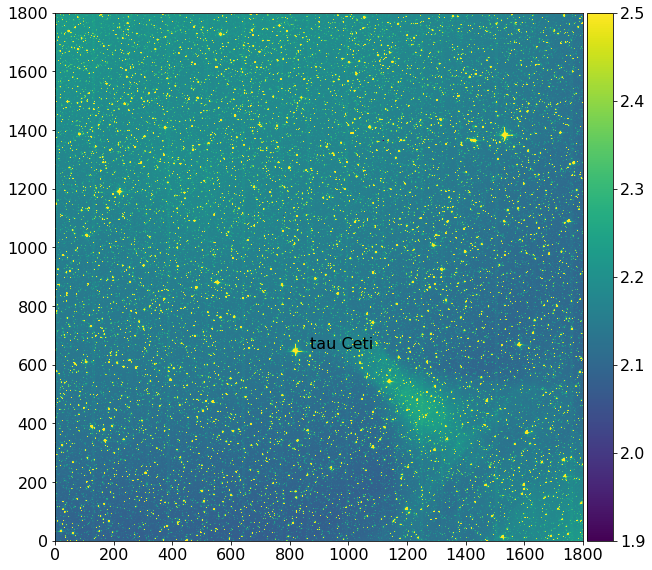

In [102]:
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
ax = plt.gca()
plt.imshow(np.log10(im),vmin=1.9,vmax=2.5,interpolation=None)
plt.text(1070-250+50,900-250+5,'tau Ceti')
# plt.imshow(im,vmax=5000)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(cax=cax)

xs = np.arange(250,1750)
ys = np.arange(250,1750)
plt.savefig('big_ffi.png',bbox_inches='tight')

In [87]:
uncertainty = ffi[2][250:2050,250:2050]

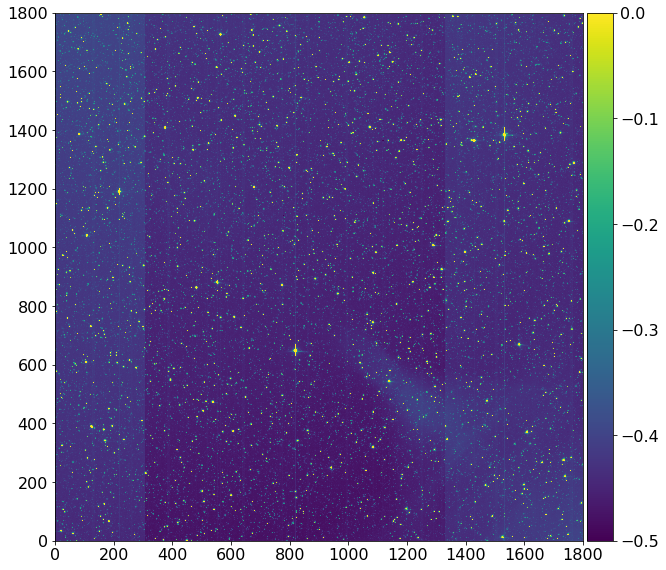

In [88]:
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
ax = plt.gca()
plt.imshow(np.log10(uncertainty),vmin=-0.5,vmax=0.0,interpolation=None)
# plt.imshow(im,vmax=5000)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(cax=cax)

xs = np.arange(250,1750)
ys = np.arange(250,1750)
# plt.text(1070-250+50,900-250+5,'tau Ceti')


### What do the raw data look like?

In [89]:
fname = '../data/tess2018277172940-s0003-1-2-0123-s_ffir.fits'
raw = fitsio.FITS(fname)
raw


  file: ../data/tess2018277172940-s0003-1-2-0123-s_ffir.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       PRIMARY[1]
  1      IMAGE_HDU       CAMERA.CCD 1.2 uncal[1]

In [90]:
raw_im = raw[1][250:2050,250:2050]

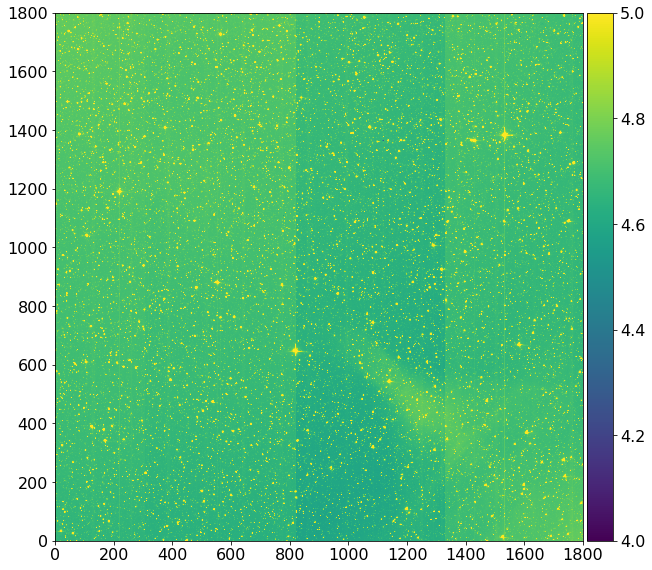

In [100]:
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
ax = plt.gca()
plt.imshow(np.log10(raw_im-np.nanmin(raw_im)),vmin=4,vmax=5,interpolation=None)
# plt.imshow(im,vmax=5000)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(cax=cax)

xs = np.arange(250,1750)
ys = np.arange(250,1750)
# plt.text(1070-250+50,900-250+5,'tau Ceti')
